In [34]:
#initial imports
import pandas as pd
import re

LTPATH = r""
DTPATH = r""


In [35]:
#clean demographic data
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\cc-est2022-all.csv'

# Read the Excel file into a pandas DataFrame
demog = pd.read_csv(excel_file, encoding='latin1')

# Display the columns
print("Columns in the Excel file:")
for column in demog.columns:
    print(column)

Columns in the Excel file:
SUMLEV
STATE
COUNTY
STNAME
CTYNAME
YEAR
AGEGRP
TOT_POP
TOT_MALE
TOT_FEMALE
WA_MALE
WA_FEMALE
BA_MALE
BA_FEMALE
IA_MALE
IA_FEMALE
AA_MALE
AA_FEMALE
NA_MALE
NA_FEMALE
TOM_MALE
TOM_FEMALE
WAC_MALE
WAC_FEMALE
BAC_MALE
BAC_FEMALE
IAC_MALE
IAC_FEMALE
AAC_MALE
AAC_FEMALE
NAC_MALE
NAC_FEMALE
NH_MALE
NH_FEMALE
NHWA_MALE
NHWA_FEMALE
NHBA_MALE
NHBA_FEMALE
NHIA_MALE
NHIA_FEMALE
NHAA_MALE
NHAA_FEMALE
NHNA_MALE
NHNA_FEMALE
NHTOM_MALE
NHTOM_FEMALE
NHWAC_MALE
NHWAC_FEMALE
NHBAC_MALE
NHBAC_FEMALE
NHIAC_MALE
NHIAC_FEMALE
NHAAC_MALE
NHAAC_FEMALE
NHNAC_MALE
NHNAC_FEMALE
H_MALE
H_FEMALE
HWA_MALE
HWA_FEMALE
HBA_MALE
HBA_FEMALE
HIA_MALE
HIA_FEMALE
HAA_MALE
HAA_FEMALE
HNA_MALE
HNA_FEMALE
HTOM_MALE
HTOM_FEMALE
HWAC_MALE
HWAC_FEMALE
HBAC_MALE
HBAC_FEMALE
HIAC_MALE
HIAC_FEMALE
HAAC_MALE
HAAC_FEMALE
HNAC_MALE
HNAC_FEMALE


In [36]:
demog = demog[demog['AGEGRP'] == 0]
demog = demog[demog['YEAR'] == 1]

demog['CTYNAME'] = demog['CTYNAME'].apply(lambda x: x[:-7] if x.endswith(" County") else x)

demog['PropWhiteTC'] = (demog['WAC_MALE'] + demog['WAC_FEMALE']) / demog['TOT_POP']
demog['PropBlackTC'] = (demog['BAC_MALE'] + demog['BAC_FEMALE']) / demog['TOT_POP']
demog['PropAsianTC'] = (demog['AAC_MALE'] + demog['AAC_FEMALE']) / demog['TOT_POP']
demog['PropHispaTC'] = (demog['H_MALE'] + demog['H_FEMALE']) / demog['TOT_POP']
demog['PropWhiteTA'] = (demog['WA_MALE'] + demog['WA_FEMALE']) / demog['TOT_POP']
demog['PropBlackTA'] = (demog['BA_MALE'] + demog['BA_FEMALE']) / demog['TOT_POP']
demog['PropAsianTA'] = (demog['AA_MALE'] + demog['AA_FEMALE']) / demog['TOT_POP']

demog = demog.loc[:, ['CTYNAME', 'STNAME', 'STATE', 'COUNTY','PropWhiteTC',"TOT_POP",
                      'PropBlackTC', 'PropAsianTC', 'PropHispaTC',
                      'PropWhiteTA', 'PropAsianTA', 'PropBlackTA']]

demog.head()


,CTYNAME,STNAME,STATE,COUNTY,PropWhiteTC,TOT_POP,PropBlackTC,PropAsianTC,PropHispaTC,PropWhiteTA,PropAsianTA,PropBlackTA
0,Autauga,Alabama,1,1,0.776742,58802,0.214500,0.016921,0.031342,0.759107,0.011751,0.204466
76,Baldwin,Alabama,1,3,0.891582,231761,0.096440,0.015943,0.047105,0.872705,0.011063,0.087405
152,Barbour,Alabama,1,5,0.501943,25224,0.491635,0.007057,0.047613,0.489613,0.004599,0.481367
228,Bibb,Alabama,1,7,0.779776,22300,0.217848,0.004709,0.028834,0.767444,0.002601,0.210404
304,Blount,Alabama,1,9,0.970455,59130,0.022577,0.006021,0.095890,0.957128,0.003754,0.017216


In [37]:
demog.count()

CTYNAME        3144
STNAME         3144
STATE          3144
COUNTY         3144
PropWhiteTC    3144
TOT_POP        3144
PropBlackTC    3144
PropAsianTC    3144
PropHispaTC    3144
PropWhiteTA    3144
PropAsianTA    3144
PropBlackTA    3144
dtype: int64

In [38]:
demog['BlackQuintile'] = pd.qcut(demog["PropBlackTC"], 5, labels=False) + 1
demog['BlackQuartile'] = pd.qcut(demog["PropBlackTC"], 4, labels=False) + 1
demog['BlackDecile'] = pd.qcut(demog["PropBlackTC"], 10, labels=False) + 1
demog['BlackTercile'] = pd.qcut(demog["PropBlackTC"], 3, labels=False) + 1


demog['AsnQuintile'] = pd.qcut(demog["PropAsianTC"], 5, labels=False) + 1
demog['AsnQuartile'] = pd.qcut(demog["PropAsianTC"], 4, labels=False) + 1
demog['AsnDecile'] = pd.qcut(demog["PropAsianTC"], 10, labels=False) + 1
demog['AsnTercile'] = pd.qcut(demog["PropAsianTC"], 3, labels=False) + 1
demog['HispaQuintile'] = pd.qcut(demog["PropHispaTC"], 5, labels=False) + 1
demog['HispaQuartile'] = pd.qcut(demog["PropHispaTC"], 4, labels=False) + 1
demog['HispaDecile'] = pd.qcut(demog["PropHispaTC"], 10, labels=False) + 1
demog['HispaTercile'] = pd.qcut(demog["PropHispaTC"], 3, labels=False) + 1
demog['WhiteQuintile'] = pd.qcut(demog["PropWhiteTC"], 5, labels=False) + 1
demog['WhiteQuartile'] = pd.qcut(demog["PropWhiteTC"], 4, labels=False) + 1
demog['WhiteDecile'] = pd.qcut(demog["PropWhiteTC"], 10, labels=False) + 1
demog['WhiteTercile'] = pd.qcut(demog["PropWhiteTC"], 3, labels=False) + 1

In [39]:
result = demog.groupby('BlackDecile')['PropBlackTC'].agg(['max', 'min']).reset_index()

print(result)
result = demog.groupby('WhiteDecile')['PropWhiteTC'].agg(['max', 'min']).reset_index()

print(result)
result = demog.groupby('HispaDecile')['PropHispaTC'].agg(['max', 'min']).reset_index()

print(result)
result = demog.groupby('AsnDecile')['PropAsianTC'].agg(['max', 'min']).reset_index()

print(result)

   BlackDecile       max       min
0            1  0.011116  0.000495
1            2  0.014139  0.011121
2            3  0.017989  0.014139
3            4  0.024387  0.017992
4            5  0.035564  0.024418
5            6  0.055833  0.035639
6            7  0.091914  0.055865
7            8  0.165140  0.091990
8            9  0.314920  0.165506
9           10  0.866448  0.316468
   WhiteDecile       max       min
0            1  0.634181  0.057812
1            2  0.769773  0.636840
2            3  0.853881  0.770596
3            4  0.902702  0.854246
4            5  0.931591  0.902784
5            6  0.951574  0.931606
6            7  0.963545  0.951695
7            8  0.973903  0.963551
8            9  0.980530  0.974000
9           10  0.995370  0.980549
   HispaDecile       max       min
0            1  0.017378  0.006608
1            2  0.023032  0.017387
2            3  0.028834  0.023034
3            4  0.036153  0.028862
4            5  0.046795  0.036173
5            6  0.06

In [40]:
#merge and clean bond data

# Replace 'your_excel_file.xlsx' with the path to your Excel file

excel_file = r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\bonds\combined_file.xlsx'
# Read the Excel file into a pandas DataFrame
muni = pd.read_excel(excel_file)

# Display the columns
print("Columns in the Excel file:")
for column in muni.columns:
    print(column)

Columns in the Excel file:
8-digit CUSIP
9-digit CUSIP
State of Issuer
County
Joint action
Name of Issuer
Gross Spread (per thousand) (USD)
Reported Gross Spread (per thousand) (USD)
SDC Estimated Gross Spread (per thousand) (USD)
Management fee (USD)
Underwriters' fee (USD)
Bid Type
Security
Sinking fund flag
Callable Issue
All Managers Code
All Use of Proceeds
All Use of Proceeds - Bond Buyer
Asset-Backed Indicator Flag (Y/N)
Auction Rate Flag
Bank Eligible
Bank Qualified
Book entry
Charter School Flag (Y/N)
Climate Bond (Y/N)
Composite Amount (USD Millions)
Credit Enhancer Type
Deals with Financial Advisor (Y/N)
Deals with Underwriter Counsel (Y/N)
Fitch's Enhanced Long Term Rating
Fitch's Enhanced Short Term Rating
Fitch's Insured Long Term Rating
Fitch's Insured Short Term Rating
Fitch's Underlying Long Term Rating
Fitch's Underlying Short Term Rating
Insured Amount - Tranche (USD Millions)
Issuer Type
Moody's Enhanced Long Term Rating
Moody's Enhanced Short Term Rating
Moody's In

In [41]:
muni = muni.rename(columns={"State of Issuer": "STNAME"})

# Create a new DataFrame to hold the expanded rows
expanded_rows = []

# Iterate through each row in muni DataFrame
for index, row in muni.iterrows():
    # Initialize the status variable
    status = 0  # 0 means no change
    
    # Check if 'County' is a string and contains a slash
    if isinstance(row['County'], str) and '/' in row['County']:
        # Split the county names separated by a slash
        counties = row['County'].split('/')
        # Create a new row for each county
        for county in counties:
            new_row = row.copy()  # Create a copy of the original row
            new_row['County'] = county.strip()  # Update the 'County' column with the individual county
            expanded_rows.append(new_row)  # Append the new row to the list of expanded rows
        status = 1  # 1 means split
    elif isinstance(row['County'], float):
        status = 2  # 2 means it's a float
    
    # Add the status to the row
    row['Status'] = status
    
    # Append the row to the list of expanded rows
    expanded_rows.append(row)

# Create a new DataFrame from the list of expanded rows
expanded_muni = pd.DataFrame(expanded_rows)

muni = expanded_muni.rename(columns={"County": "CTYNAME"})

In [42]:
muni.head()

muni.rename(columns={"Fitch's Insured Long Term Rating": 'Fitch_Long', "Fitch's Insured Short Term Rating": 'Fitch_Short', "Moody's Insured Long Term Rating": 'Moody_Long', "Moody's Insured Short Term Rating": 'Moody_Short'}, inplace=True)

# Define a function to extract the highest Moody's rating from a string
def extract_highest_rating(s):
    ratings_order = ['Aaa', 'Aa1', 'Aa2', 'Aa3', 'A1', 'A2', 'A3', 
                     'Baa1', 'Baa2', 'Baa3', 'Ba1', 'Ba2', 'Ba3',
                     'Caa1', 'Caa2', 'Caa3', 'Ca', 'C','NR']
    max_rating = 'C'  # Default lowest rating
    for rating in ratings_order:
        if rating in s:
            max_rating = rating
            break  # Stop when the highest rating is found
    return max_rating


# Define a function to assign an ordinal number to each rating
def rating_to_number(rating):
    rating_to_num = {'Aaa': 1, 'Aa1': 2, 'Aa2': 3, 'Aa3': 4, 'A1': 5, 'A2': 6, 'A3': 7,
                     'Baa1': 8, 'Baa2': 9, 'Baa3': 10, 'Ba1': 11, 'Ba2': 12, 'Ba3': 13,
                     'Caa1': 14, 'Caa2': 15, 'Caa3': 16, 'Ca': 17, 'C': 18}
    return rating_to_num.get(rating, 18)  # Default value is 18 if rating not found

# Apply the functions to each row and create new columns 'Moody_High' and 'Moody_Number'
muni['Moody_High'] = muni['Moody_Long'].fillna('').apply(extract_highest_rating)
muni['Moody_Number'] = muni['Moody_High'].apply(rating_to_number)




print("Columns in the Excel file:")
for column in muni.columns:
    print(column)



Columns in the Excel file:
8-digit CUSIP
9-digit CUSIP
STNAME
CTYNAME
Joint action
Name of Issuer
Gross Spread (per thousand) (USD)
Reported Gross Spread (per thousand) (USD)
SDC Estimated Gross Spread (per thousand) (USD)
Management fee (USD)
Underwriters' fee (USD)
Bid Type
Security
Sinking fund flag
Callable Issue
All Managers Code
All Use of Proceeds
All Use of Proceeds - Bond Buyer
Asset-Backed Indicator Flag (Y/N)
Auction Rate Flag
Bank Eligible
Bank Qualified
Book entry
Charter School Flag (Y/N)
Climate Bond (Y/N)
Composite Amount (USD Millions)
Credit Enhancer Type
Deals with Financial Advisor (Y/N)
Deals with Underwriter Counsel (Y/N)
Fitch's Enhanced Long Term Rating
Fitch's Enhanced Short Term Rating
Fitch_Long
Fitch_Short
Fitch's Underlying Long Term Rating
Fitch's Underlying Short Term Rating
Insured Amount - Tranche (USD Millions)
Issuer Type
Moody's Enhanced Long Term Rating
Moody's Enhanced Short Term Rating
Moody_Long
Moody_Short
Moody's Underlying Long Term Rating
Moo

In [43]:
merged_df = pd.merge(muni, demog, on=['STNAME', 'CTYNAME'], how='left')

In [44]:
merged_df.head()
print(merged_df.dtypes)
typechangedf = merged_df.copy()
typechangedf['8-digit CUSIP'] = typechangedf['8-digit CUSIP'].astype(str)
#typechangedf=merged_df.astype(str)

8-digit CUSIP     object
9-digit CUSIP     object
STNAME            object
CTYNAME           object
Joint action        bool
                  ...   
HispaTercile     float64
WhiteQuintile    float64
WhiteQuartile    float64
WhiteDecile      float64
WhiteTercile     float64
Length: 99, dtype: object


In [45]:

#merged_df.to_stata(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\stata\MuniDemo.dta",version=117)

In [46]:
race_and_tax =  pd.read_csv(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\race_and_Taxes\race_and_tax.csv")


In [47]:

race_and_tax.rename(columns={'state': 'STNAME'}, inplace=True)
print(race_and_tax.head())

        STNAME  AntiAffirm  Racial Resent  Google Search  Change in Vote  \
0    Louisiana           1              1            2.0             6.0   
1  Mississippi           2              3            4.0             2.0   
2      Alabama           4              2            8.5             1.0   
3      Georgia           3              4           16.5             3.0   
4     Arkansas           6              7           14.5            13.5   

   Tweets   sum  number of bond issues  number by hbcu  tax privilege  
0     1.0  11.0                     57               4            6.0  
1     4.0  15.0                     46               9            5.0  
2     2.0  17.5                     89              14            5.0  
3    11.5  38.0                     99              14            6.0  
4     3.0  44.0                    107               3            7.0  


In [48]:
merged_df = pd.merge(typechangedf, race_and_tax, on=['STNAME'], how='left')

In [49]:
# Read the CSV file
file_path = r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\educationrates.csv'
df = pd.read_csv(file_path)

# Remove columns that include "Margin of Error" in their header
columns_to_remove = [col for col in df.columns if 'Margin of Error' in col or 'RACE' in col or 'Female' in col or 'Male' in col or 'POVERTY' in col or 'MEDIAN' in col or 'Total!' in col]
educdf_cleaned = df.drop(columns=columns_to_remove)

columns_with_only_X = [col for col in educdf_cleaned.columns if (educdf_cleaned[col] == '(X)').all()]
educdf_cleaned = educdf_cleaned.drop(columns=columns_with_only_X)

# Save the cleaned dataframe to a new CSV file
output_path = r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\cleaned_educrates.csv'



# Dictionary mapping original column names to human-readable names
rename_dict = {
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate": "18-24 Less than High School",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)": "18-24 High School Graduate",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree": "18-24 Some College or Associate's",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher": "18-24 Bachelor's or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade": "25+ Less than 9th Grade",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma": "25+ 9th to 12th No Diploma",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)": "25+ High School Graduate",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree": "25+ Some College No Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "25+ Associate's Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree": "25+ Bachelor's Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree": "25+ Graduate or Professional Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher": "25+ High School or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": "25+ Bachelor's or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!High school graduate or higher": "25-34 High School or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!Bachelor's degree or higher": "25-34 Bachelor's or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!High school graduate or higher": "35-44 High School or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!Bachelor's degree or higher": "35-44 Bachelor's or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!High school graduate or higher": "45-64 High School or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!Bachelor's degree or higher": "45-64 Bachelor's or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher": "65+ High School or Higher",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelor's degree or higher": "65+ Bachelor's or Higher"
}

# Rename the columns
educdf_cleaned = educdf_cleaned.rename(columns=rename_dict)


# Split the 'Geographic Area Name' column into 'County Name' and 'State Name' columns
educdf_cleaned[['CTYNAME', 'STNAME']] = df['Geographic Area Name'].str.split(' County, ', expand=True)

# Drop the original 'Geographic Area Name' column if needed
educdf_cleaned = educdf_cleaned.drop(columns=['Geographic Area Name'])
educdf_cleaned.to_csv(output_path, index=False)
print(f"Columns removed: {columns_to_remove}")
print(f"Cleaned CSV file saved to: {output_path}")

Columns removed: ['Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years', 'Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years', 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate', 'Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate', 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)', 'Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)', "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree", "Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree", "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher", "Margi

C:\Users\rra3\AppData\Local\Temp\ipykernel_4456\1049121674.py:3: DtypeWarning: Columns (118,119,122,123,124,125,132,133,134,135,136,137,138,139,168,169,170,171,192,193,194,195,222,223,224,225,228,229,230,231,234,235,236,237,242,243,244,245,374,375,378,379,380,381,388,389,390,391,392,393,394,395,424,425,426,427,448,449,450,451,484,485,486,487,490,491,492,493,494,495,496,497,498,499,500,501,630,631,644,645,646,647,648,649,650,651,680,681,682,683,704,705,706,707,740,741,742,743,746,747,748,749,750,751,752,753,754,755,756,757) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [50]:
# Read the CSV file
file_path = r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\poverty rates.csv'
df = pd.read_csv(file_path)

# Remove columns that include "Margin of Error" in their header
columns_to_remove = [col for col in df.columns if 'Margin of Error' in col or 'RACE' in col or 'Female' in col or 'Male' in col or 'years' in col or 'MEDIAN' in col or 'UNRELATED' in col or 'AGE' in col or 'ATTAINMENT' in col]
povdf_cleaned = df.drop(columns=columns_to_remove)

columns_with_only_X = [col for col in povdf_cleaned.columns if (povdf_cleaned[col] == '(X)').all()]
povdf_cleaned = povdf_cleaned.drop(columns=columns_with_only_X)

# Save the cleaned dataframe to a new CSV file
output_path = r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\cleaned_povrates.csv'

# Mapping of original column names to new human-readable names
new_column_names = {
    'Geography': 'Geography',
    'Geographic Area Name': 'Geographic Area Name',
    'Estimate!!Total!!Population for whom poverty status is determined': 'Total Population',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!50 percent of poverty level': 'Below 50% Poverty Level',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!125 percent of poverty level': 'Below 125% Poverty Level',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!150 percent of poverty level': 'Below 150% Poverty Level',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!185 percent of poverty level': 'Below 185% Poverty Level',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!200 percent of poverty level': 'Below 200% Poverty Level',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!300 percent of poverty level': 'Below 300% Poverty Level',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!400 percent of poverty level': 'Below 400% Poverty Level',
    'Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!500 percent of poverty level': 'Below 500% Poverty Level',
    'Estimate!!Below poverty level!!Population for whom poverty status is determined': 'Below Poverty Level Population',
    'Estimate!!Percent below poverty level!!Population for whom poverty status is determined': 'Percent Below Poverty Level Population'
}

# Rename the columns
povdf_cleaned.rename(columns=new_column_names, inplace=True)

povdf_cleaned[['CTYNAME', 'STNAME']] = df['Geographic Area Name'].str.split(' County, ', expand=True)

# Drop the original 'Geographic Area Name' column if needed
povdf_cleaned = povdf_cleaned.drop(columns=['Geographic Area Name'])
povdf_cleaned.to_csv(output_path, index=False)
print(f"Columns removed: {columns_to_remove}")
print(f"Cleaned CSV file saved to: {output_path}")

Columns removed: ['Margin of Error!!Total!!Population for whom poverty status is determined', 'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years', 'Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years', 'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years', 'Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years', 'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years', 'Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years', 'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Related children of householder under 18 years', 'Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Related children of householder under 18 years', 'E

C:\Users\rra3\AppData\Local\Temp\ipykernel_4456\1575600492.py:3: DtypeWarning: Columns (248,249,250,251,252,253,254,255,296,297,340,341,352,353,354,355,356,357,364,365) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [51]:
povdf_cleaned.head()

,Geography,Total Population,Below 50% Poverty Level,Below 125% Poverty Level,Below 150% Poverty Level,Below 185% Poverty Level,Below 200% Poverty Level,Below 300% Poverty Level,Below 400% Poverty Level,Below 500% Poverty Level,Below Poverty Level Population,Percent Below Poverty Level Population,CTYNAME,STNAME
0,0500000US01001,55181,3504,10760,12611,15883,17499,27259,35423,42806,8394,15.2,Autauga,Alabama
1,0500000US01003,215170,7250,28632,36413,50285,57127,92639,125889,152143,19739,9.2,Baldwin,Alabama
2,0500000US01005,22070,3018,7553,8965,10606,11152,14933,17176,18930,6312,28.6,Barbour,Alabama
3,0500000US01007,20748,1875,4646,5730,7811,8370,12236,16059,17595,3755,18.1,Bibb,Alabama
4,0500000US01009,57127,3834,10542,13624,18517,20042,32176,41075,46170,7847,13.7,Blount,Alabama


In [52]:
poveducmerge = pd.merge(povdf_cleaned,educdf_cleaned, on=['CTYNAME','STNAME'], how='left')
poverty_merge = pd.merge(merged_df, povdf_cleaned, on=['CTYNAME','STNAME'], how='left')
educ_merge = pd.merge(poverty_merge, educdf_cleaned, on=['CTYNAME','STNAME'], how='left')



In [53]:
educ_merge.to_csv("fuckmeplease.csv")
poveducmerge.to_csv("mergepoveduc.csv")

In [54]:
percapinc = pd.read_csv(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\percapinccounties.csv")


In [55]:
taxdata = pd.read_csv(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\bonds\gov finance data\CountyData.csv")
Taxdatamaxyear = taxdata.loc[taxdata.groupby('FIPS_Combined')['Year4'].idxmax()]

# Dictionary mapping FIPS codes to state names
fips_to_state = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut', 
    10: 'Delaware', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 
    19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts', 
    26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 
    33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 
    39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 
    46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 
    54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 11: 'District of Columbia'
}
Taxdatamaxyear['CTYNAME'] = Taxdatamaxyear['Name'].str.replace(' COUNTY', '', case=False).str.lower().str.title()
# Mapping FIPS codes to state names
Taxdatamaxyear['STNAME'] = Taxdatamaxyear['FIPS_Code_State'].map(fips_to_state)

# Columns to keep
columns_to_keep = [
    'Year4', 
    'STNAME', 
    'CTYNAME', 
    'Total_Revenue', 
    'Total_Rev_Own_Sources', 
    'Total_Taxes', 
    'Property_Tax', 
    'Tot_Sales___Gr_Rec_Tax'
]

# Dropping all other columns except the ones to keep
Taxdatamaxyearfiltered = Taxdatamaxyear[columns_to_keep]


In [56]:
# Load the spreadsheet
crimedf = pd.read_excel(r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\countycrimes_FBIsourcecleaned.xlsx')

# Strip text from " - " onwards in the 'state' column
crimedf['State'] = crimedf['State'].str.split(' - ').str[0]
crimedf['County'] = crimedf['County'].str.replace(r'[0-9]', '', regex=True)
crimedf['State'] = crimedf['State'].str.replace(r'[0-9]', '', regex=True)
crimedf['STNAME'] = crimedf['State'].str.title()
crimedf.rename(columns={'County': 'CTYNAME'}, inplace=True)
crimedf.head()

,State,CTYNAME,Property\ncrime,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson2,STNAME
0,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama
1,ARIZONA,Cochise,531.0,47.0,0.0,1.0,3.0,43.0,195.0,273.0,63.0,5.0,Arizona
2,ARIZONA,Coconino,264.0,127.0,6.0,17.0,1.0,103.0,59.0,180.0,25.0,6.0,Arizona
3,ARIZONA,Mohave,1983.0,135.0,3.0,6.0,19.0,107.0,573.0,1197.0,213.0,13.0,Arizona
4,ARIZONA,Pinal,1469.0,197.0,3.0,5.0,18.0,171.0,321.0,987.0,161.0,NaN,Arizona


In [57]:

percapinc.rename(columns={'dollar2020': 'Percap2020','dollar2021': 'Percap2021','dollar2022': 'Percap2022'}, inplace=True)

In [58]:
unempdf = pd.read_csv(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\demog\Unemployment Rate by County (Percent).csv")


# Define a dictionary to map state abbreviations to full names
state_abbreviations = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Split the "Region Name" column into "County" and "State Abbreviation"
unempdf[['County', 'State Abbreviation']] = unempdf['Region Name'].str.split(', ', expand=True)

# Remove the word "County" from the "County" column
unempdf['CTYNAME'] = unempdf['County'].str.replace(' County', '', regex=False)

# Map the state abbreviations to full names
unempdf['STNAME'] = unempdf['State Abbreviation'].map(state_abbreviations)

# Drop the "State Abbreviation" column if no longer needed
unempdf.drop(columns=['State Abbreviation'], inplace=True)
unempdf.drop(columns=['Series ID'], inplace=True)
unempdf.drop(columns=['Region Code'], inplace=True)
unempdf.drop(columns=['Region Name'], inplace=True)
unempdf.head()



,unemployment 1/1/17,unemployment 2/1/17,unemployment 3/1/17,unemployment 4/1/17,unemployment 5/1/17,unemployment 6/1/17,unemployment 7/1/17,unemployment 8/1/17,unemployment 9/1/17,unemployment 10/1/17,...,unemployment 10/1/23,unemployment 11/1/23,unemployment 12/1/23,unemployment 1/1/24,unemployment 2/1/24,unemployment 3/1/24,unemployment 4/1/24,County,CTYNAME,STNAME
0,5.2,4.9,4.3,3.7,3.5,4.3,4.2,4.1,3.5,3.4,...,2.3,2.2,2.2,2.7,3.0,2.6,2.3,Autauga County,Autauga,Alabama
1,5.8,5.5,4.6,3.8,3.6,4.2,3.9,4.0,3.6,3.6,...,2.4,2.3,2.5,3.2,3.2,2.9,2.5,Baldwin County,Baldwin,Alabama
2,8.0,7.2,6.5,5.8,5.2,6.4,6.2,6.1,5.3,5.1,...,4.5,4.3,4.6,5.4,5.8,4.9,4.1,Barbour County,Barbour,Alabama
3,6.1,5.8,5.0,4.2,4.1,4.9,4.8,4.4,3.9,3.7,...,2.5,2.5,2.5,3.1,3.4,3.0,2.5,Bibb County,Bibb,Alabama
4,5.6,5.2,4.7,3.9,3.8,4.5,4.1,4.1,3.5,3.5,...,2.2,2.2,2.3,3.0,3.1,2.7,2.4,Blount County,Blount,Alabama


In [59]:
merged_df.head(20)

columns_to_remove = [col for col in educ_merge.columns if 'Geography' in col or 'RACE' in col or 'Female' in col or 'Male' in col or 'MEDIAN' in col or 'years' in col or "UNRELATED" in col]

educ_merge = educ_merge.drop(columns=columns_to_remove)


taxmerge = pd.merge(educ_merge,Taxdatamaxyearfiltered, on=['CTYNAME','STNAME'], how='left')



exportdf = taxmerge.copy()


midexport = pd.merge(exportdf,percapinc, on=['CTYNAME','STNAME'], how='left')
finalexport = pd.merge(midexport,crimedf, on=['CTYNAME','STNAME'], how='left')


# List of columns to be converted to float
columns_to_convert = [
    '18-24 Less than High School',
    '18-24 High School Graduate',
    '18-24 Some College or Associate\'s',
    '18-24 Bachelor\'s or Higher',
    '25+ Less than 9th Grade',
    '25+ 9th to 12th No Diploma',
    '25+ High School Graduate',
    '25+ Some College No Degree',
    '25+ Associate\'s Degree',
    '25+ Bachelor\'s Degree',
    '25+ Graduate or Professional Degree',
    '25+ High School or Higher',
    '25+ Bachelor\'s or Higher',
    '25-34 High School or Higher',
    '25-34 Bachelor\'s or Higher',
    '35-44 High School or Higher',
    '35-44 Bachelor\'s or Higher',
    '45-64 High School or Higher',
    '45-64 Bachelor\'s or Higher',
    '65+ High School or Higher',
    '65+ Bachelor\'s or Higher'
]

# Convert the specified columns to float
for column in columns_to_convert:
    finalexport[column] = pd.to_numeric(finalexport[column], errors='coerce')

for column in columns_to_convert:
    exportdf[column] = pd.to_numeric(exportdf[column], errors='coerce')
bool_columns = finalexport.select_dtypes(include='bool').columns
finalexport[bool_columns] = finalexport[bool_columns].astype(int)
# Check the data types to confirm the conversion
print(finalexport.dtypes)


8-digit CUSIP             object
9-digit CUSIP             object
STNAME                    object
CTYNAME                   object
Joint action               int32
                          ...   
Aggravated\nassault      float64
Burglary                 float64
Larceny-\ntheft          float64
Motor\nvehicle\ntheft    float64
Arson2                   float64
Length: 165, dtype: object


In [60]:
# Sample data for DataFrame A

df_a = finalexport

# Sample data for DataFrame B

df_b = unempdf

# Convert dates in DataFrame A to datetime
df_a['date'] = pd.to_datetime(df_a['Sale Date'])

# Extract year and month from DataFrame A dates
df_a['year_month'] = df_a['date'].dt.to_period('M')

# Reshape DataFrame B
df_b_long = pd.melt(df_b, id_vars=['CTYNAME', 'STNAME'], var_name='date', value_name='unemployment')

# Extract the date part and convert to datetime
df_b_long['date'] = df_b_long['date'].str.replace('unemployment ', '')

df_b_long = df_b_long[~df_b_long['date'].str.contains('county', case=False, na=False)]
df_b_long['date'] = pd.to_datetime(df_b_long['date'], format=r'%m/%d/%y')

# Extract year and month for merging
df_b_long['year_month'] = df_b_long['date'].dt.to_period('M')

# Drop the original date column
df_b_long = df_b_long.drop(columns=['date'])

# Merge the dataframes
mergedunemp_df = pd.merge(df_a, df_b_long, on=['CTYNAME', 'STNAME', 'year_month'], how='left')

# Drop the year_month column as it is no longer needed
mergedunemp_df = mergedunemp_df.drop(columns=['year_month'])

mergedunemp_df.head()


,8-digit CUSIP,9-digit CUSIP,STNAME,CTYNAME,Joint action,Name of Issuer,Gross Spread (per thousand) (USD),Reported Gross Spread (per thousand) (USD),SDC Estimated Gross Spread (per thousand) (USD),Management fee (USD),...,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson2,date,unemployment
0,166087LR,166087LR5,Pennsylvania,Delaware,0,54525,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-02,4.6
1,nan,NaN,Texas,Rockwell,0,225650,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-02,NaN
2,93978PNZ,93978PNZ6,Washington,King,0,335825,NaN,8.5,NaN,NaN,...,5.0,64.0,176.0,362.0,796.0,2132.0,693.0,77.0,2018-01-02,4.0
3,nan,NaN,New York,Sullivan,0,462200,NaN,NaN,NaN,NaN,...,0.0,6.0,1.0,20.0,34.0,234.0,5.0,1.0,2018-01-03,5.6
4,639438K9;639438L2;639438L3;639438L4;639438L5;6...,639438K90;639438L24;639438L32;639438L40;639438...,Pennsylvania,Northampton,0,215050,NaN,7.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-03,5.3


In [61]:
print(mergedunemp_df.dtypes)

8-digit CUSIP                    object
9-digit CUSIP                    object
STNAME                           object
CTYNAME                          object
Joint action                      int32
                              ...      
Larceny-\ntheft                 float64
Motor\nvehicle\ntheft           float64
Arson2                          float64
date                     datetime64[ns]
unemployment                     object
Length: 167, dtype: object


In [62]:
#finalexport.drop(["clone"],axis=1,inplace=True)
print('fuck')
#finalexport.drop(["year_month"],axis=1,inplace=True)
#finalexport.to_stata(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\stata\countymuni.dta",version=117)
print('fuck')
#mergedunemp_df.drop(["clone"],axis=1,inplace=True)
#mergedunemp_df.drop(["year_month"],axis=1,inplace=True)
print('fuck')
mergedunemp_df.drop(["clone"],axis=1,inplace=True)
mergedunemp_df['unemployment'] = mergedunemp_df['unemployment'].astype(float)
mergedunemp_df.to_stata(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\stata\countymuniunemp.dta",version=117)
print('fuck')
merged_df.to_stata(r"C:\Users\rra3\Desktop\summer2024TYP\muni\data\stata\MuniDemo.dta",version=117)
print('fuck')

fuck
fuck
fuck


C:\Users\rra3\AppData\Local\Temp\ipykernel_4456\2376389028.py:11: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    8-digit CUSIP   ->   _8_digit_CUSIP
    9-digit CUSIP   ->   _9_digit_CUSIP
    Joint action   ->   Joint_action
    Name of Issuer   ->   Name_of_Issuer
    Gross Spread (per thousand) (USD)   ->   Gross_Spread__per_thousand___USD
    Reported Gross Spread (per thousand) (USD)   ->   Reported_Gross_Spread__per_thous
    SDC Estimated Gross Spread (per thousand) (USD)   ->   SDC_Estimated_Gross_Spread__per_
    Management fee (USD)   ->   Management_fee__USD_
    Underwriters' fee (USD)   ->   Underwriters__fee__USD_
    Bid Type   ->   Bid_Type
    Sinking fund flag   ->   Sinking_fund_flag
    Callable Issue   ->   Callable_Issue
    All Managers Code   ->   All_Managers_Code
    All Use of Proceeds   ->   All_Use_of_Proceeds
    All Use of Proceeds - Bond Buyer   ->   All_Use_of_Proceeds___B

fuck


C:\Users\rra3\AppData\Local\Temp\ipykernel_4456\2376389028.py:13: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    8-digit CUSIP   ->   _8_digit_CUSIP
    9-digit CUSIP   ->   _9_digit_CUSIP
    Joint action   ->   Joint_action
    Name of Issuer   ->   Name_of_Issuer
    Gross Spread (per thousand) (USD)   ->   Gross_Spread__per_thousand___USD
    Reported Gross Spread (per thousand) (USD)   ->   Reported_Gross_Spread__per_thous
    SDC Estimated Gross Spread (per thousand) (USD)   ->   SDC_Estimated_Gross_Spread__per_
    Management fee (USD)   ->   Management_fee__USD_
    Underwriters' fee (USD)   ->   Underwriters__fee__USD_
    Bid Type   ->   Bid_Type
    Sinking fund flag   ->   Sinking_fund_flag
    Callable Issue   ->   Callable_Issue
    All Managers Code   ->   All_Managers_Code
    All Use of Proceeds   ->   All_Use_of_Proceeds
    All Use of Proceeds - Bond Buyer   ->   All_Use_of_Proceeds___B

fuck


In [63]:
finalexport["Sale Date"].head()

0   2018-01-02
1   2018-01-02
2   2018-01-02
3   2018-01-03
4   2018-01-03
Name: Sale Date, dtype: datetime64[ns]

C:\Users\rra3\AppData\Local\Temp\ipykernel_4456\48021946.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


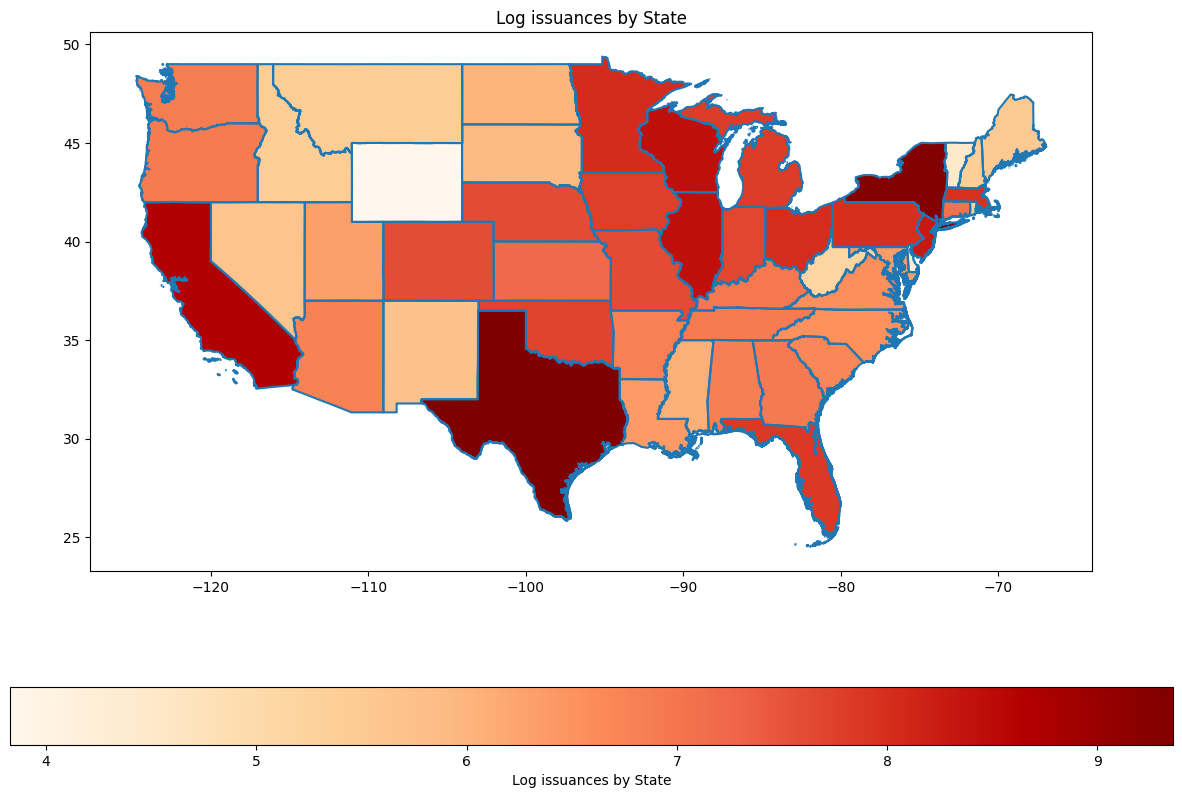

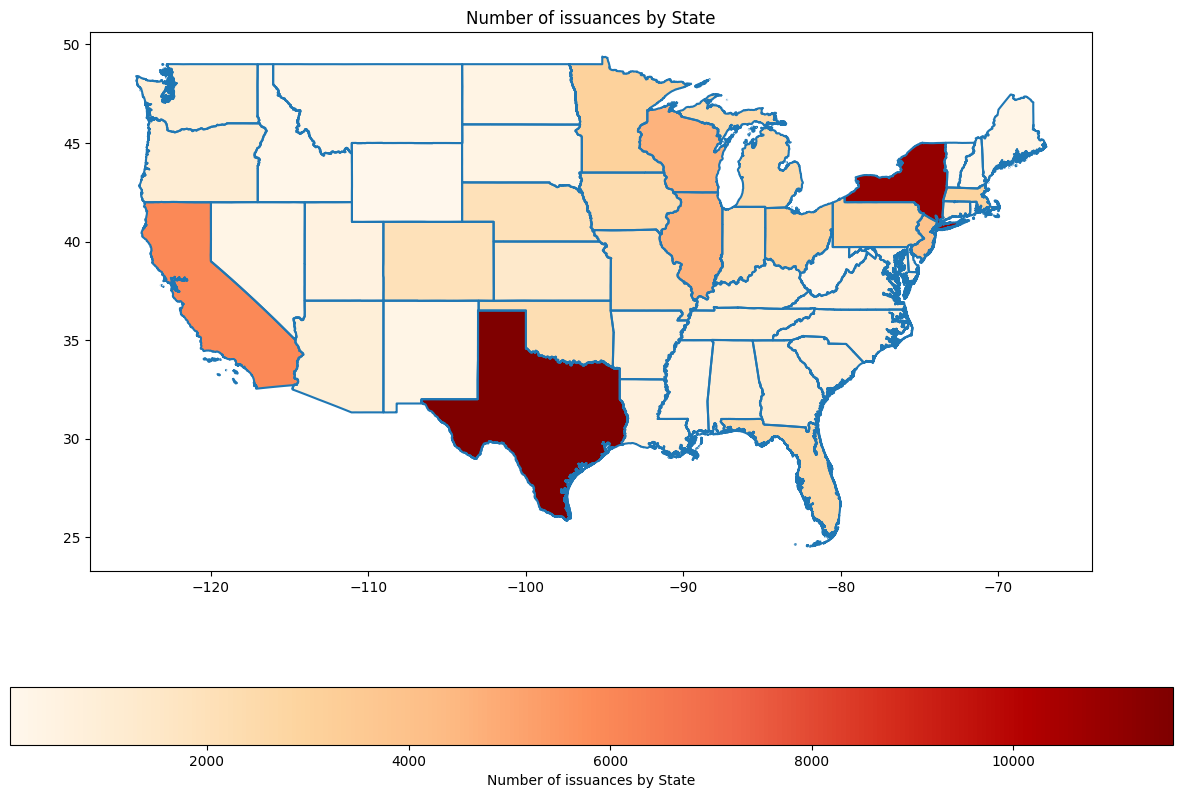

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
state_counts = finalexport['STNAME'].value_counts().reset_index()
state_counts.columns=['STNAME','count']
state_counts['logcount']=np.log(state_counts['count'])

states_to_drop = ["Virgin Islands", "Foreign", "Puerto Rico", "American Samoa", "Guam", "Hawaii", "Alaska"]

state_counts = state_counts[~state_counts["STNAME"].isin(states_to_drop)]
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['continent'] == 'North America']

states = gpd.read_file(r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\shapefile\statebounds.shp')

states = states.merge(state_counts, left_on='NAME', right_on='STNAME', how='right')

# Step 4: Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states.boundary.plot(ax=ax)
states.plot(column='logcount', ax=ax, legend=True,
            legend_kwds={'label': "Log issuances by State",
                         'orientation': "horizontal"},
            cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('Log issuances by State')
plt.show()
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states.boundary.plot(ax=ax)
states.plot(column='count', ax=ax, legend=True,
            legend_kwds={'label': "Number of issuances by State",
                         'orientation': "horizontal"},
            cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('Number of issuances by State')
plt.show()

In [65]:
print (state_counts)

                  STNAME  count  logcount
0                  Texas  11580  9.357035
1               New York  10974  9.303284
2             California   5985  8.697012
3               Illinois   4612  8.436417
4              Wisconsin   4612  8.436417
5             New Jersey   3956  8.282989
6              Minnesota   3062  8.026824
7                   Ohio   2979  7.999343
8           Pennsylvania   2929  7.982416
9          Massachusetts   2888  7.968320
10               Florida   2606  7.865572
11              Michigan   2466  7.810353
12                  Iowa   2352  7.763021
13              Oklahoma   2239  7.713785
14               Indiana   2157  7.676474
15              Missouri   2054  7.627544
16              Nebraska   2028  7.614805
17              Colorado   2008  7.604894
18                Kansas   1358  7.213768
19           Connecticut   1174  7.068172
20              Kentucky   1052  6.958448
21               Georgia   1030  6.937314
22                Oregon   1002  6

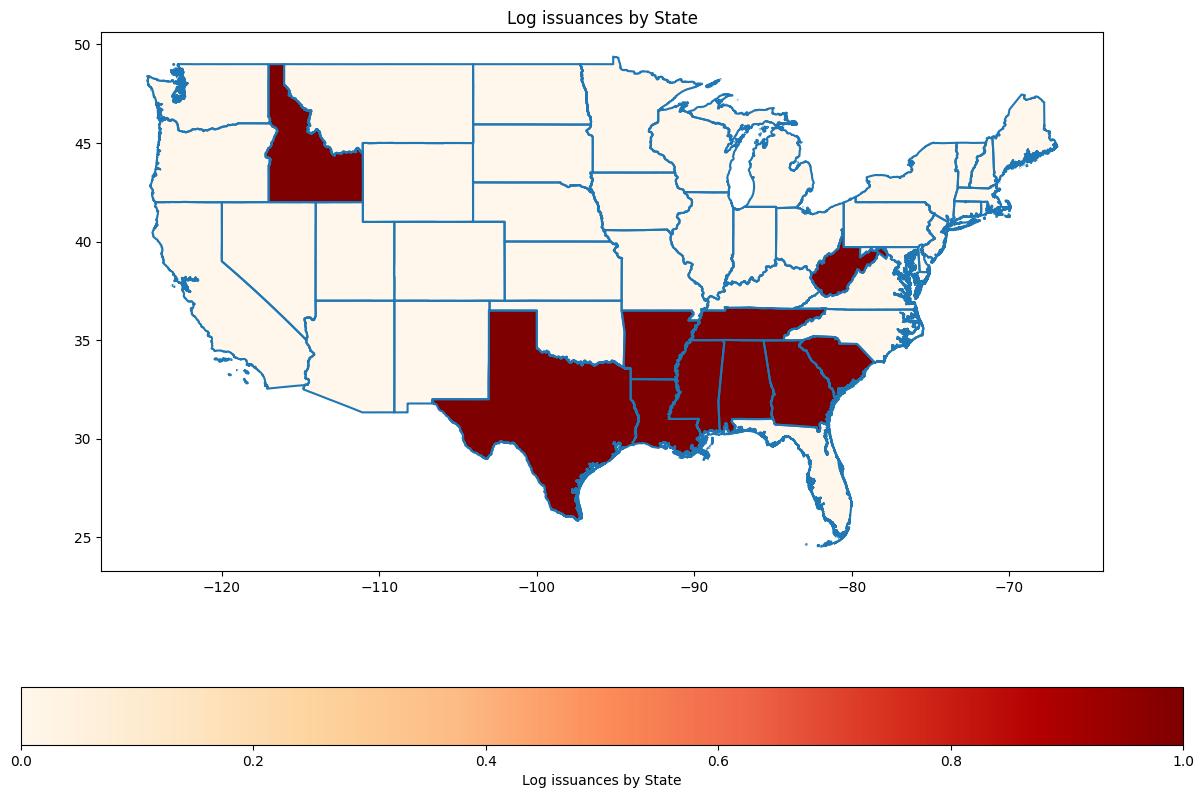

In [66]:
#state_counts = state_counts.drop(columns=["count", "logcount"])

# Create a new column 'animus' with all 0's
state_counts['animus'] = 0

# Replace rows where 'STNAME' is in the specified list with 1
animus_states = ["Alabama", "Arkansas", "Georgia", "Idaho", "Louisiana", "Mississippi", 
                 "South Carolina", "Tennessee", "Texas", "West Virginia"]
state_counts.loc[state_counts['STNAME'].isin(animus_states), 'animus'] = 1


states = gpd.read_file(r'C:\Users\rra3\Desktop\summer2024TYP\muni\data\shapefile\statebounds.shp')

states = states.merge(state_counts, left_on='NAME', right_on='STNAME', how='right')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states.boundary.plot(ax=ax)
states.plot(column='animus', ax=ax, legend=True,
            legend_kwds={'label': "Log issuances by State",
                         'orientation': "horizontal"},
            cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('Log issuances by State')
plt.show()
plt.close()